### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

### Reading the Dataset

In [2]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
 "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
 "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
 "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
df = pd.read_csv(filename, names = headers)
print(df.shape)
df.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Replace the ? Values with NaN 

In [5]:
df.replace('?', np.nan,inplace=True)

### Checking NaN Values

In [6]:
df.isnull().sum()[df.isnull().sum() > 0]

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

### Drop Rows with NaN values in Price Column

In [7]:
df.dropna(subset=['price'], inplace=True, how='any')
df.shape

(201, 26)

### Replace the NaN Values of the given columns by their Mean

In [8]:
cols = ['normalized-losses',
        'bore',
        'stroke',
        'horsepower',
        'peak-rpm']

for j in cols:
    df[j] = df[j].astype(np.float64)

for i in cols:
        df[i].fillna(df[i].mean(), inplace=True)

### Replace the NaN Value of the Column by its Mode

In [9]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

### Resetting the Index

In [10]:
df = df.reset_index().drop('index', axis=1)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Checking the Data Types of the Columns in the Dataframe

In [11]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [12]:
df['price'] = df['price'].astype(np.float64)

### Transform city-mpg and highway-mpg into liters/100km

In [13]:
df['city-L/100km'] = 235/df['city-mpg']
df['highway-L/100km'] = 235/df['highway-mpg']

### Normalizing the Columns Length, Width and Height

In [14]:
cols1 = ['length','width','height']

for i in cols1:
    df[i] = df[i]/df[i].max()

### Horsepower Histogram

In [15]:
import matplotlib.pyplot as plt

df['horsepower'].hist()
plt.show()

import seaborn as sns

sns.kdeplot(df['horsepower'], shade=True, )
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### Horsepower-binned Distribution

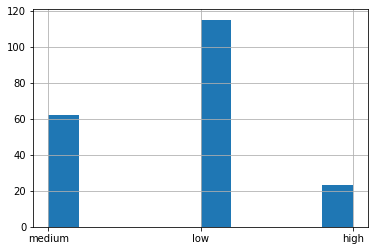

In [16]:
binwidth = (df['horsepower'].max() - df['horsepower'].min())/4 
bins = np.arange(df['horsepower'].min(), df['horsepower'].max(), binwidth)
groups = ['low', 'medium', 'high'] 
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels = groups, include_lowest = True)

df['horsepower-binned'].hist()
plt.show()

### One Hot Encoding on columns Fuel-Type and Aspiration

In [17]:
df1 = pd.concat( [df,pd.get_dummies( df["fuel-type"]) , pd.get_dummies(df["aspiration"])], axis=1)
df1.drop( ["fuel-type", "aspiration"], axis=1)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,medium,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,medium,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,medium,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,medium,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,medium,0,1,1,0
5,2,122.0,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,19,25,15250.0,12.368421,9.400000,medium,0,1,1,0
6,1,158.0,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,19,25,17710.0,12.368421,9.400000,medium,0,1,1,0
7,1,122.0,audi,four,wagon,fwd,front,105.8,0.925997,0.991667,...,19,25,18920.0,12.368421,9.400000,medium,0,1,1,0
8,1,158.0,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,17,20,23875.0,13.823529,11.750000,medium,0,1,0,1
9,2,192.0,bmw,two,sedan,rwd,front,101.2,0.849592,0.900000,...,23,29,16430.0,10.217391,8.103448,low,0,1,1,0
